# Analysis of Mouse Cortex Single Cell RNA sequence data
## Isaac Berez

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import DBSCAN

# Loading Data
## Load data from text file

In [2]:
ls

list1
list2
mouse_cortex_single_cell_RNA_seq_analysis.ipynb
mouse_cortex_single_cell_RNA_seq_analysis.pdf
mouse_cortex_single_cell_RNA_seq_analysis_BP.ipynb
task_Isaac.docx
task_Isaac_12_06_23.pages*
task_Isaac_12_06_23.pdf


In [4]:
# Specify the file path
file_path = "expression_mRNA_17-Aug-2014.txt"

# Load the text file into a DataFrame
df = pd.read_csv(file_path, delimiter='\t', low_memory=False)

# Display the loaded data
print(df.head())

  Unnamed: 0          tissue sscortex sscortex.1 sscortex.2 sscortex.3  \
0        NaN         group #        1          1          1          1   
1        NaN  total mRNA mol    21580      21748      31642      32916   
2        NaN            well       11         95         33         42   
3        NaN             sex        1         -1         -1          1   
4        NaN             age       21         20         20         21   

  sscortex.4 sscortex.5 sscortex.6 ca1hippocampus  ... ca1hippocampus.1310  \
0          1          1          1              1  ...                   9   
1      21531      24799      31406          20389  ...                5893   
2         48         13         50             66  ...                  92   
3          1         -1          1             -1  ...                   1   
4         25         20         25             23  ...                  23   

  sscortex.1685 sscortex.1686 sscortex.1687 sscortex.1688 ca1hippocampus.1311  \
0    

# Setup relevant variables

In [5]:
gene_id = df.iloc[10:,:1]
gene_id.columns = ['gene_id']

In [6]:
gene_id

,gene_id
10,Tspan12
11,Tshz1
12,Fnbp1l
13,Adamts15
14,Cldn12
...,...
19977,Gm20738_loc4
19978,Gm20738_loc6
19979,Gm21943_loc1
19980,Gm21943_loc3


In [7]:
df.describe

<bound method NDFrame.describe of          Unnamed: 0          tissue sscortex sscortex.1 sscortex.2 sscortex.3  \
0               NaN         group #        1          1          1          1   
1               NaN  total mRNA mol    21580      21748      31642      32916   
2               NaN            well       11         95         33         42   
3               NaN             sex        1         -1         -1          1   
4               NaN             age       21         20         20         21   
...             ...             ...      ...        ...        ...        ...   
19977  Gm20738_loc4               0        0          0          0          0   
19978  Gm20738_loc6               0        0          0          0          0   
19979  Gm21943_loc1               0        0          0          0          0   
19980  Gm21943_loc3               0        0          0          0          0   
19981  Gm20738_loc3               0        0          0          0         

In [8]:
data = df.iloc[10:,1:]

In [9]:
data

,tissue,sscortex,sscortex.1,sscortex.2,sscortex.3,sscortex.4,sscortex.5,sscortex.6,ca1hippocampus,sscortex.7,...,ca1hippocampus.1310,sscortex.1685,sscortex.1686,sscortex.1687,sscortex.1688,ca1hippocampus.1311,ca1hippocampus.1312,sscortex.1689,ca1hippocampus.1313,sscortex.1690
10,1,0,0,0,3,0,0,3,0,0,...,0,0,0,0,0,0,0,0,0,1
11,1,3,1,0,2,2,2,2,1,0,...,0,0,0,0,0,0,0,0,0,1
12,1,3,1,6,4,1,2,1,0,5,...,0,0,0,0,0,0,0,0,0,0
13,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14,1,1,1,1,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19977,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19978,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19979,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19980,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
data.columns

Index(['tissue', 'sscortex', 'sscortex.1', 'sscortex.2', 'sscortex.3',
       'sscortex.4', 'sscortex.5', 'sscortex.6', 'ca1hippocampus',
       'sscortex.7',
       ...
       'ca1hippocampus.1310', 'sscortex.1685', 'sscortex.1686',
       'sscortex.1687', 'sscortex.1688', 'ca1hippocampus.1311',
       'ca1hippocampus.1312', 'sscortex.1689', 'ca1hippocampus.1313',
       'sscortex.1690'],
      dtype='object', length=3006)

In [11]:
sex_flag = df.iloc[3:4,2:]
sex_flag = sex_flag.rename(index = {3:'sex_flag'})
sex_flag

,sscortex,sscortex.1,sscortex.2,sscortex.3,sscortex.4,sscortex.5,sscortex.6,ca1hippocampus,sscortex.7,sscortex.8,...,ca1hippocampus.1310,sscortex.1685,sscortex.1686,sscortex.1687,sscortex.1688,ca1hippocampus.1311,ca1hippocampus.1312,sscortex.1689,ca1hippocampus.1313,sscortex.1690
sex_flag,1,-1,-1,1,1,-1,1,-1,1,1,...,1,-1,-1,1,-1,-1,-1,1,-1,1


In [12]:
diameter = df.iloc[5:6,2:]
diameter = diameter.rename(index = {5:'diameter'})
diameter

,sscortex,sscortex.1,sscortex.2,sscortex.3,sscortex.4,sscortex.5,sscortex.6,ca1hippocampus,sscortex.7,sscortex.8,...,ca1hippocampus.1310,sscortex.1685,sscortex.1686,sscortex.1687,sscortex.1688,ca1hippocampus.1311,ca1hippocampus.1312,sscortex.1689,ca1hippocampus.1313,sscortex.1690
diameter,0,9.56,11.1,11.7,11,11.9,11.3,10.9,12.9,11.2,...,0,7.91,9.72,9.74,10.6,9.85,11,8.63,9.23,10.4


In [13]:
cell_type = df.iloc[8:9,2:]
cell_type = cell_type.rename(index = {8:'cell_type'})
cell_type

,sscortex,sscortex.1,sscortex.2,sscortex.3,sscortex.4,sscortex.5,sscortex.6,ca1hippocampus,sscortex.7,sscortex.8,...,ca1hippocampus.1310,sscortex.1685,sscortex.1686,sscortex.1687,sscortex.1688,ca1hippocampus.1311,ca1hippocampus.1312,sscortex.1689,ca1hippocampus.1313,sscortex.1690
cell_type,Int10,Int10,Int6,Int10,Int9,Int9,Int10,Int9,Int10,Int10,...,(none),(none),(none),Peric,Peric,Peric,Vsmc,Vsmc,Vsmc,Vsmc


In [14]:
cls = df.iloc[7:8,2:]
cls = cls.rename(index = {7:'level1class'})
cls

,sscortex,sscortex.1,sscortex.2,sscortex.3,sscortex.4,sscortex.5,sscortex.6,ca1hippocampus,sscortex.7,sscortex.8,...,ca1hippocampus.1310,sscortex.1685,sscortex.1686,sscortex.1687,sscortex.1688,ca1hippocampus.1311,ca1hippocampus.1312,sscortex.1689,ca1hippocampus.1313,sscortex.1690
level1class,interneurons,interneurons,interneurons,interneurons,interneurons,interneurons,interneurons,interneurons,interneurons,interneurons,...,endothelial-mural,endothelial-mural,endothelial-mural,endothelial-mural,endothelial-mural,endothelial-mural,endothelial-mural,endothelial-mural,endothelial-mural,endothelial-mural


In [15]:
l2cls = df.iloc[8:9,2:]
l2cls = l2cls.rename(index = {8:'level2class'})
l2cls

,sscortex,sscortex.1,sscortex.2,sscortex.3,sscortex.4,sscortex.5,sscortex.6,ca1hippocampus,sscortex.7,sscortex.8,...,ca1hippocampus.1310,sscortex.1685,sscortex.1686,sscortex.1687,sscortex.1688,ca1hippocampus.1311,ca1hippocampus.1312,sscortex.1689,ca1hippocampus.1313,sscortex.1690
level2class,Int10,Int10,Int6,Int10,Int9,Int9,Int10,Int9,Int10,Int10,...,(none),(none),(none),Peric,Peric,Peric,Vsmc,Vsmc,Vsmc,Vsmc


# Histogram of Total mRNA molecules per cell

In [16]:
#data

#### sanity check that total mRNA molecules of a cell = sum of genes for a cell

In [17]:
data['sscortex'] = data['sscortex'].astype('int32')

In [18]:
data['sscortex'].sum()

21580

In [19]:
total_mRNA_molecules = df.iloc[1:2,2:]
total_mRNA_molecules = total_mRNA_molecules.rename(index = {1:'total_mRNA_molecules'})

In [20]:
total_mRNA_molecules = total_mRNA_molecules.T
total_mRNA_molecules

,total_mRNA_molecules
sscortex,21580
sscortex.1,21748
sscortex.2,31642
sscortex.3,32916
sscortex.4,21531
...,...
ca1hippocampus.1311,4585
ca1hippocampus.1312,2559
sscortex.1689,4015
ca1hippocampus.1313,2896


In [21]:
print ('min total molecular counts', np.min(np.array(total_mRNA_molecules, dtype = 'int32')))
print ('max total molecular counts', np.max(np.array(total_mRNA_molecules, dtype = 'int32')))
print ('avg total molecular counts', np.mean(np.array(total_mRNA_molecules, dtype = 'int32')))
print ('std dev total molecular counts', np.std(np.array(total_mRNA_molecules, dtype = 'int32')))


min total molecular counts 2509
max total molecular counts 61982
avg total molecular counts 13957.121797004991
std dev total molecular counts 8939.320818941866


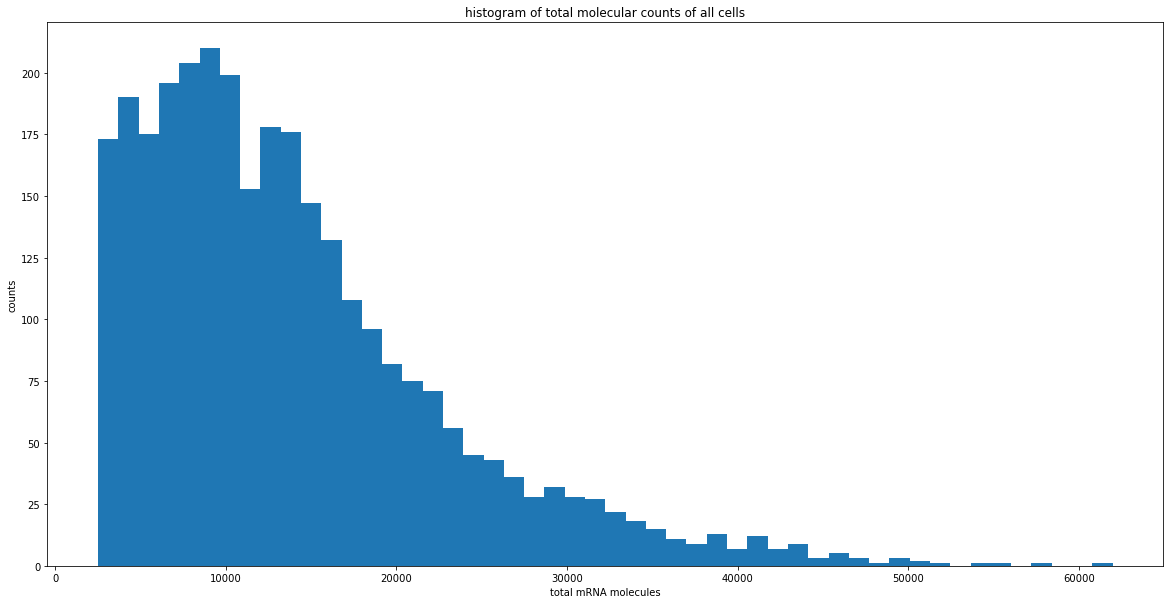

In [22]:
plt.figure('hist of total molecular counts', figsize = (20,10))
plt.title('histogram of total molecular counts of all cells')
plt.hist(x = np.array(total_mRNA_molecules, dtype = 'int32'), bins = 50)
plt.ylabel('counts')
plt.xlabel('total mRNA molecules')
plt.show()

In [23]:
total_mRNA_molecules['total_mRNA_molecules']

sscortex               21580
sscortex.1             21748
sscortex.2             31642
sscortex.3             32916
sscortex.4             21531
                       ...  
ca1hippocampus.1311     4585
ca1hippocampus.1312     2559
sscortex.1689           4015
ca1hippocampus.1313     2896
sscortex.1690           4460
Name: total_mRNA_molecules, Length: 3005, dtype: object

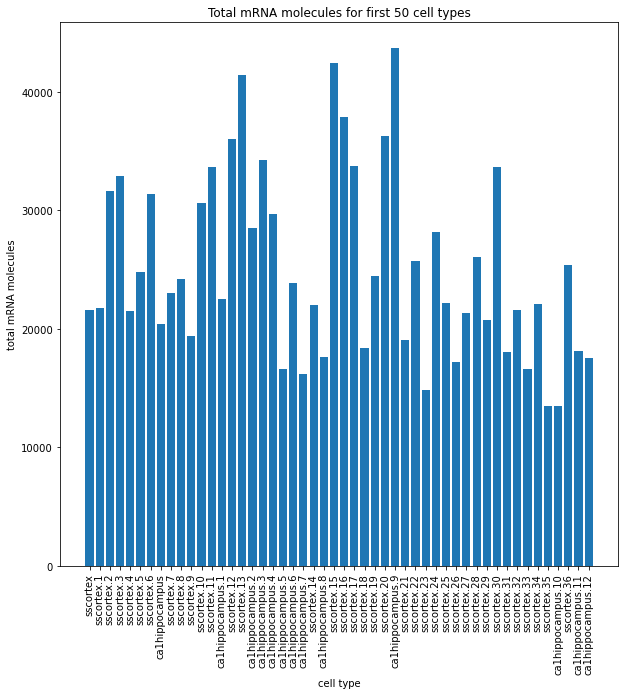

In [24]:
plt.figure('Total mRNA molecules per cell', figsize = (10,10))

plt.title('Total mRNA molecules for first 50 cell types')
plt.bar(total_mRNA_molecules.index[:50], np.array(total_mRNA_molecules, dtype = 'int32')[:50].flatten())
plt.ylabel('total mRNA molecules')
plt.xlabel('cell type')
plt.xticks(rotation = 90)
plt.show()

# mRNA Molecules per cell vs. cell diameter
## Scatter plot of number of molecules per cells versus the cell diameter. Is there correlation?

In [25]:
len(total_mRNA_molecules)

3005

In [26]:
len(diameter.T)

3005

In [27]:
arr_molecules = np.array(total_mRNA_molecules[:],dtype = 'int32')
arr_molecules

array([[21580],
       [21748],
       [31642],
       ...,
       [ 4015],
       [ 2896],
       [ 4460]], dtype=int32)

In [28]:

arr_diameter = np.array(diameter[:], dtype = 'float32')
arr_diameter = arr_diameter.reshape((np.shape(arr_diameter)[1]),1)
arr_diameter

array([[ 0.  ],
       [ 9.56],
       [11.1 ],
       ...,
       [ 8.63],
       [ 9.23],
       [10.4 ]], dtype=float32)

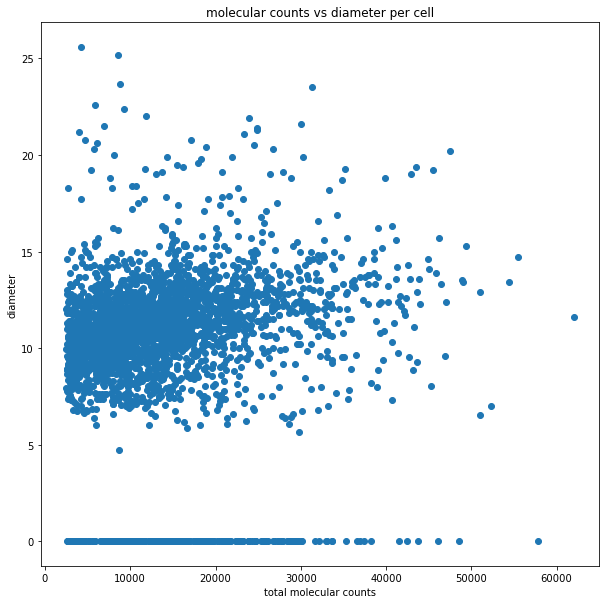

In [29]:
plt.figure(figsize=(10,10))
plt.title('molecular counts vs diameter per cell')
plt.scatter(arr_molecules[:],arr_diameter[:])
plt.xlabel('total molecular counts')
plt.ylabel('diameter')
#plt.ylim(5,20)
plt.show()

# Data Filtering 
## remove genes expressed in <10% and >60% of the cells, and the assume a gene is "expressed" in a given cell if it has at least 1 molecular count

In [30]:
data

,tissue,sscortex,sscortex.1,sscortex.2,sscortex.3,sscortex.4,sscortex.5,sscortex.6,ca1hippocampus,sscortex.7,...,ca1hippocampus.1310,sscortex.1685,sscortex.1686,sscortex.1687,sscortex.1688,ca1hippocampus.1311,ca1hippocampus.1312,sscortex.1689,ca1hippocampus.1313,sscortex.1690
10,1,0,0,0,3,0,0,3,0,0,...,0,0,0,0,0,0,0,0,0,1
11,1,3,1,0,2,2,2,2,1,0,...,0,0,0,0,0,0,0,0,0,1
12,1,3,1,6,4,1,2,1,0,5,...,0,0,0,0,0,0,0,0,0,0
13,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14,1,1,1,1,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19977,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19978,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19979,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19980,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
gene_id

,gene_id
10,Tspan12
11,Tshz1
12,Fnbp1l
13,Adamts15
14,Cldn12
...,...
19977,Gm20738_loc4
19978,Gm20738_loc6
19979,Gm21943_loc1
19980,Gm21943_loc3


## test case on first 10 genes and cells to prove filtering working as desired

In [32]:
gene_id_subset = gene_id.iloc[:10]
gene_id_subset

,gene_id
10,Tspan12
11,Tshz1
12,Fnbp1l
13,Adamts15
14,Cldn12
15,Rxfp1
16,2310042E22Rik
17,Sema3c
18,Jam2
19,Apbb1ip


In [33]:
gene_id_subset.drop(index = [11,15,19])

,gene_id
10,Tspan12
12,Fnbp1l
13,Adamts15
14,Cldn12
16,2310042E22Rik
17,Sema3c
18,Jam2


In [34]:
data_subset = data.iloc[:10,:10]

In [35]:
data_subset

,tissue,sscortex,sscortex.1,sscortex.2,sscortex.3,sscortex.4,sscortex.5,sscortex.6,ca1hippocampus,sscortex.7
10,1,0,0,0,3,0,0,3,0,0
11,1,3,1,0,2,2,2,2,1,0
12,1,3,1,6,4,1,2,1,0,5
13,1,0,0,0,0,0,0,0,0,0
14,1,1,1,1,0,0,0,0,0,2
15,1,0,0,0,0,0,1,0,0,1
16,1,0,0,2,3,0,0,0,0,0
17,1,11,0,25,1,10,0,7,0,8
18,1,1,0,1,0,0,1,0,0,1
19,1,0,0,0,0,0,0,1,0,0


In [36]:
np.array(data_subset).astype('int32')

array([[ 1,  0,  0,  0,  3,  0,  0,  3,  0,  0],
       [ 1,  3,  1,  0,  2,  2,  2,  2,  1,  0],
       [ 1,  3,  1,  6,  4,  1,  2,  1,  0,  5],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  1,  1,  1,  0,  0,  0,  0,  0,  2],
       [ 1,  0,  0,  0,  0,  0,  1,  0,  0,  1],
       [ 1,  0,  0,  2,  3,  0,  0,  0,  0,  0],
       [ 1, 11,  0, 25,  1, 10,  0,  7,  0,  8],
       [ 1,  1,  0,  1,  0,  0,  1,  0,  0,  1],
       [ 1,  0,  0,  0,  0,  0,  0,  1,  0,  0]], dtype=int32)

In [37]:
# Check each row and remove rows with <10% and >60% non-zero values

print ('pre filtered gene subset: \n', gene_id_subset)
print ('pre filtered data subset: \n', data_subset)
rows_to_keep = []
gene_indices_to_drop = []
for i, row in enumerate(np.array(data_subset).astype('int32')):
    non_zero_count = np.count_nonzero(row)
    total_count = row.size
    non_zero_percentage = non_zero_count / total_count * 100

    if 10 < non_zero_percentage < 60:
        rows_to_keep.append(row)
    else:
        gene_indices_to_drop.append(i)
        #print ('removing row from gene subset', row, 'found at index',i)
        #filtered_gene_subset = gene_id_subset.drop(index = i+10)
        #print (filtered_gene_subset)

gene_indices_to_drop_int = [int(i)+10 for i in gene_indices_to_drop]
    
# Create a new matrix with the filtered rows
filtered_matrix = np.array(rows_to_keep)
#update gene_id_subset vector
gene_id_subset = gene_id_subset.drop(index = gene_indices_to_drop_int)

# Print the filtered matrix
#print('post filtered gene subset: \n',filtered_gene_subset)
print('post filtered data subset: \n',filtered_matrix)
print('gene indices to drop: \n', gene_indices_to_drop_int)
print('post filtered gene id subset: \n', gene_id_subset )

pre filtered gene subset: 
           gene_id
10        Tspan12
11          Tshz1
12         Fnbp1l
13       Adamts15
14         Cldn12
15          Rxfp1
16  2310042E22Rik
17         Sema3c
18           Jam2
19        Apbb1ip
pre filtered data subset: 
    tissue  sscortex sscortex.1 sscortex.2 sscortex.3 sscortex.4 sscortex.5  \
10      1         0          0          0          3          0          0   
11      1         3          1          0          2          2          2   
12      1         3          1          6          4          1          2   
13      1         0          0          0          0          0          0   
14      1         1          1          1          0          0          0   
15      1         0          0          0          0          0          1   
16      1         0          0          2          3          0          0   
17      1        11          0         25          1         10          0   
18      1         1          0          1   

## apply to full data
    

In [38]:
print (data.shape)
print (gene_id.shape)

(19972, 3006)
(19972, 1)


In [39]:
#convert data matrix into np array of int32
data_arr = np.array(data).astype('int32')

print ('initial dimensions of data matrix: ', data_arr.shape)
print ('initial dimensions of geneid vector: ', gene_id.shape)

rows_to_keep = []
gene_indices_to_drop = []
for i, row in enumerate(data_arr):
    non_zero_count = np.count_nonzero(row)
    total_count = row.size
    non_zero_percentage = non_zero_count / total_count * 100

    if 10 < non_zero_percentage < 60:
        rows_to_keep.append(row)
    else:
        gene_indices_to_drop.append(i)

gene_indices_to_drop_int = [int(i)+10 for i in gene_indices_to_drop]
print ('number of genes removed: ',len(gene_indices_to_drop_int))

# Create a new matrix with the filtered rows
data_filtered = np.array(rows_to_keep)
#update gene_id vector
gene_id_filtered = gene_id.drop(index = gene_indices_to_drop_int)

print ('post filtering dimensions of data matrix: ', data_filtered.shape)
print ('post filtering dimensions of geneid vector: ', gene_id_filtered.shape)

initial dimensions of data matrix:  (19972, 3006)
initial dimensions of geneid vector:  (19972, 1)
number of genes removed:  11742
post filtering dimensions of data matrix:  (8230, 3006)
post filtering dimensions of geneid vector:  (8230, 1)


# Log2 Transform of Data
## Generate a log2 transform of the data matrix using log2(x+1) operation. 

In [40]:
data_filtered_transformed = np.log2(data_filtered+1)

In [41]:
data_filtered_transformed.shape

(8230, 3006)

In [42]:
data_filtered[:5,:5]

array([[ 1,  0,  0,  0,  3],
       [ 1,  3,  1,  0,  2],
       [ 1,  3,  1,  6,  4],
       [ 1,  1,  1,  1,  0],
       [ 1, 11,  0, 25,  1]], dtype=int32)

In [43]:
data_filtered_transformed[:5,:5]

array([[1.        , 0.        , 0.        , 0.        , 2.        ],
       [1.        , 2.        , 1.        , 0.        , 1.5849625 ],
       [1.        , 2.        , 1.        , 2.80735492, 2.32192809],
       [1.        , 1.        , 1.        , 1.        , 0.        ],
       [1.        , 3.5849625 , 0.        , 4.70043972, 1.        ]])

In [44]:
gene_id_filtered

,gene_id
10,Tspan12
11,Tshz1
12,Fnbp1l
14,Cldn12
17,Sema3c
...,...
19957,Rab9
19961,Msl3
19965,Vamp7
19969,Kdm5d


In [45]:
#put filtered data back into dataframe, use same index as gene id, same columns as original data matrix

In [46]:
updated_data_matrix = pd.DataFrame(data_filtered_transformed, index=gene_id_filtered.index, columns=data.columns)

In [47]:
updated_data_matrix.head()

,tissue,sscortex,sscortex.1,sscortex.2,sscortex.3,sscortex.4,sscortex.5,sscortex.6,ca1hippocampus,sscortex.7,...,ca1hippocampus.1310,sscortex.1685,sscortex.1686,sscortex.1687,sscortex.1688,ca1hippocampus.1311,ca1hippocampus.1312,sscortex.1689,ca1hippocampus.1313,sscortex.1690
10,1.0,0.000000,0.0,0.000000,2.000000,0.000000,0.000000,2.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
11,1.0,2.000000,1.0,0.000000,1.584963,1.584963,1.584963,1.584963,1.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
12,1.0,2.000000,1.0,2.807355,2.321928,1.000000,1.584963,1.000000,0.0,2.584963,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,1.0,1.000000,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.584963,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17,1.0,3.584963,0.0,4.700440,1.000000,3.459432,0.000000,3.000000,0.0,3.169925,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
updated_data_matrix.shape

(8230, 3006)

# Statistical analysis of gene expression (part 1) 
## For each gene calculate the average expression (μ) and the standard deviation (σ) and plot the CV= σ /μ   versus the μ where each gene is a dot. 

In [49]:
data_subset = data_filtered_transformed[:3,:3]
data_subset


array([[1., 0., 0.],
       [1., 2., 1.],
       [1., 2., 1.]])

In [50]:
np.shape(data_filtered_transformed)[0]

8230

In [51]:
#since we now have 8230 genes, we create place holder mu and sigma matrices (8230x1)
#to be filled in with computed values
mu = np.ones(((np.shape(data_filtered_transformed)[0]),1))
sigma = np.ones(((np.shape(data_filtered_transformed)[0]),1))

In [52]:
#compute mean and std dev row by row of filtered/transformed data matrix and update mean and sigma vectors accordingly
for i, row in enumerate(data_filtered_transformed):
    mu[i] = np.mean(row)
    sigma[i] = np.std(row)
    

In [53]:
mu

array([[0.21291198],
       [0.28881097],
       [0.64992598],
       ...,
       [0.99632214],
       [0.12570769],
       [0.20199936]])

In [54]:
max_mu = np.max(mu)
min_mu = np.min(mu)
print ('max and min values of mean gene expression: ', min_mu, max_mu)
print (mu.shape)

max and min values of mean gene expression:  0.10712668203924387 2.214085892941738
(8230, 1)


In [55]:
sigma

array([[0.53572746],
       [0.65899793],
       [0.93075918],
       ...,
       [1.00713865],
       [0.38137146],
       [0.52011503]])

In [56]:
max_sigma = np.max(sigma)
min_sigma = np.min(sigma)
print ('max and min values of sigma: ', min_sigma, max_sigma)
print (sigma.shape)

max and min values of sigma:  0.32686549647286284 2.907554223537627
(8230, 1)


In [57]:
cv = sigma/mu
cv.shape

(8230, 1)

In [58]:
cv

array([[2.5161922 ],
       [2.28176211],
       [1.43210027],
       ...,
       [1.01085644],
       [3.03379582],
       [2.57483497]])

In [59]:
max_cv = np.max(cv)
min_cv = np.min(cv)
print ('max and min values of cv: ', min_cv, max_cv)
print (cv.shape)

max and min values of cv:  0.9478825694264578 3.5652849828390716
(8230, 1)


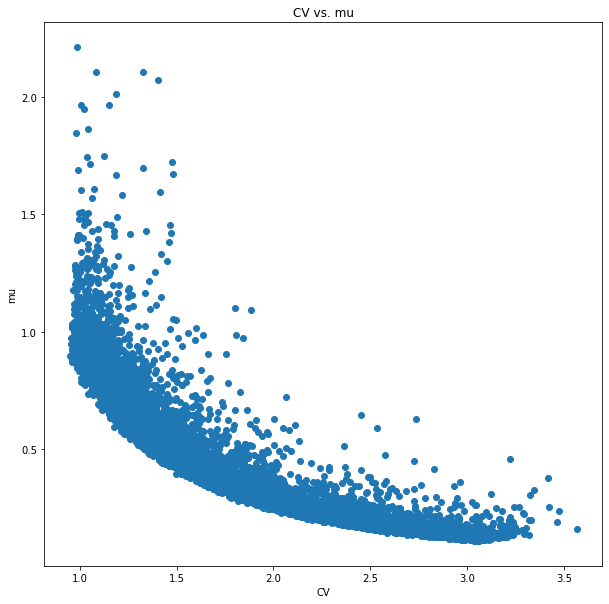

In [60]:
#%matplotlib notebook
plt.figure('CV vs. mu', figsize = (10,10))
plt.title('CV vs. mu')
plt.scatter(cv,mu)
plt.xlabel('CV')
plt.ylabel('mu')
plt.show()

# Statistical analysis of gene expression (part 2)
## Divide the genes according to their mean expression into 4 bins and select the top 200 genes of each bin with highest CV. At the end of this step, you should have 800 genes which represents high variable genes. Update the working data matrix accordingly.

In [61]:
stats = np.hstack((gene_id_filtered,mu,sigma,cv))
stats[:10]

array([['Tspan12', 0.2129119799166326, 0.5357274640272698,
        2.5161922041072473],
       ['Tshz1', 0.2888109710845225, 0.6589979319711053,
        2.2817621141485134],
       ['Fnbp1l', 0.6499259814476567, 0.9307591750960039,
        1.4321002724384313],
       ['Cldn12', 0.2975998312910843, 0.6021757021975137,
        2.023441006619798],
       ['Sema3c', 0.3824622063176225, 0.9530042442431179,
        2.491760567452457],
       ['Jam2', 0.19542093584284, 0.5339490978183341, 2.732302429703554],
       ['BC005764', 0.2523999275458656, 0.5903177308318106,
        2.3388189393380046],
       ['Klhl13', 0.389879797981124, 0.7775764895867963,
        1.9944005655415944],
       ['Tnfaip8l3', 0.2182528378642389, 0.6109498972876009,
        2.7992758456943116],
       ['Atp1b2', 0.8504458633958949, 1.1246184091640592,
        1.322386829742898]], dtype=object)

In [62]:
stats_df = pd.DataFrame({'gene_id':stats[:,0], 'mu': stats[:, 1], 'sigma': stats[:, 2],'cv': stats[:, 3]}, 
                        index = gene_id_filtered.index)
stats_df

,gene_id,mu,sigma,cv
10,Tspan12,0.212912,0.535727,2.516192
11,Tshz1,0.288811,0.658998,2.281762
12,Fnbp1l,0.649926,0.930759,1.4321
14,Cldn12,0.2976,0.602176,2.023441
17,Sema3c,0.382462,0.953004,2.491761
...,...,...,...,...
19957,Rab9,0.963642,0.980023,1.016999
19961,Msl3,0.32429,0.605388,1.866814
19965,Vamp7,0.996322,1.007139,1.010856
19969,Kdm5d,0.125708,0.381371,3.033796


In [63]:
#sort low-to-high by mean expresson
mu_sorted_stats_df = stats_df.sort_values(by='mu')
mu_sorted_stats_df.head()

,gene_id,mu,sigma,cv
7715,BC068281,0.107127,0.328115,3.06287
7401,Nkiras2,0.107383,0.326865,3.043916
18684,Slc44a2,0.107659,0.328286,3.049302
11770,Tut1,0.108043,0.330366,3.057739
18199,1700030K09Rik,0.108218,0.328658,3.036992


In [64]:
# Divide the mu_sorted_stats_df into 4 bins
num_rows = len(mu_sorted_stats_df)
num_rows_per_df = num_rows // 4  


dfs = []
for i in range(4):
    start_index = i * num_rows_per_df
    end_index = (i + 1) * num_rows_per_df
    df_slice = mu_sorted_stats_df[start_index:end_index]
    dfs.append(df_slice)

# Print the four equally sized DataFrames
for i, df in enumerate(dfs):
    print(f"DataFrame {i+1}:")
    print('len', len(df))
    print(df.head())


DataFrame 1:
len 2057
             gene_id        mu     sigma        cv
7715        BC068281  0.107127  0.328115   3.06287
7401         Nkiras2  0.107383  0.326865  3.043916
18684        Slc44a2  0.107659  0.328286  3.049302
11770           Tut1  0.108043  0.330366  3.057739
18199  1700030K09Rik  0.108218  0.328658  3.036992
DataFrame 2:
len 2057
             gene_id        mu     sigma        cv
11920       Fra10ac1  0.231529   0.52986  2.288527
15009  9330182L06Rik  0.231591  0.493674  2.131665
3280          Tmem98  0.231615  0.564708  2.438134
1248           Lsm11   0.23162  0.570311   2.46227
18859         Cep164  0.231653  0.531692  2.295211
DataFrame 3:
len 2057
       gene_id        mu     sigma        cv
11651     Dpp3  0.377347   0.64122  1.699284
17752     Mtg1  0.377396  0.601005  1.592505
13418  Tsc22d2   0.37741  0.621665  1.647186
18349  Csnk2a2  0.377747  0.676313  1.790388
400    Fam102b  0.377758  0.726431  1.923005
DataFrame 4:
len 2057
             gene_id        mu

In [65]:
print (np.max(dfs[0]['cv']))
print (np.max(dfs[1]['cv']))
print (np.max(dfs[2]['cv']))
print (np.max(dfs[3]['cv']))

3.5652849828390716
3.4728380261882283
3.4178227377685797
2.7372719338846627


In [66]:
#for each bin, sort from highest to lowest cv, then extract first 200 genes from each bin
# to get highest variabiity genes (highest CV) 

dfs_t200 = []

for i,df in enumerate(dfs):
    sorted_df = dfs[i].sort_values(by='cv', ascending=False)
    top_200 = sorted_df[:200]
    dfs_t200.append(top_200)

In [67]:
dfs_t200[0][:5]

,gene_id,mu,sigma,cv
3741,Cd83,0.157991,0.563283,3.565285
755,Ndnf,0.189371,0.655835,3.463237
172,Penk,0.196587,0.654405,3.328841
4403,Kdr,0.19813,0.657448,3.318258
818,Nppc,0.133926,0.444312,3.317583


In [68]:
dfs_t200[0].loc[dfs_t200[0].index[0]]

gene_id        Cd83
mu         0.157991
sigma      0.563283
cv         3.565285
Name: 3741, dtype: object

In [69]:
#concat dfs_t200 into single dataframe 
dfs_t200_concat = pd.concat(dfs_t200)
dfs_t200_concat

,gene_id,mu,sigma,cv
3741,Cd83,0.157991,0.563283,3.565285
755,Ndnf,0.189371,0.655835,3.463237
172,Penk,0.196587,0.654405,3.328841
4403,Kdr,0.19813,0.657448,3.318258
818,Nppc,0.133926,0.444312,3.317583
...,...,...,...,...
1247,Ngef,0.762309,1.060402,1.391039
685,6030419C18Rik,0.649196,0.902514,1.390202
1544,5031426D15Rik,0.822775,1.143489,1.389797
3114,Sc5d,0.649682,0.902897,1.389753


In [70]:
#use the indices to update the data matrix
updated_data_matrix = updated_data_matrix.loc[dfs_t200_concat.index]
updated_data_matrix

,tissue,sscortex,sscortex.1,sscortex.2,sscortex.3,sscortex.4,sscortex.5,sscortex.6,ca1hippocampus,sscortex.7,...,ca1hippocampus.1310,sscortex.1685,sscortex.1686,sscortex.1687,sscortex.1688,ca1hippocampus.1311,ca1hippocampus.1312,sscortex.1689,ca1hippocampus.1313,sscortex.1690
3741,2.584963,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000
755,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.321928,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,1.584963
172,1.000000,0.000000,1.584963,4.523562,5.087463,4.700440,5.906891,4.906891,5.169925,6.321928,...,0.000000,0.0,1.000000,1.0,0.000000,1.000000,0.0,0.000000,0.0,0.000000
4403,2.807355,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,2.321928,0.0,0.000000,0.0,0.000000
818,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.584963,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1247,1.584963,2.584963,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,1.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000
685,1.000000,1.000000,2.807355,2.321928,2.321928,2.000000,2.321928,2.321928,1.000000,2.000000,...,0.000000,0.0,1.584963,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000
1544,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.807355,0.0,0.000000,0.0,3.459432,0.000000,0.0,3.169925,0.0,0.000000
3114,2.321928,1.584963,0.000000,0.000000,0.000000,2.584963,2.000000,0.000000,0.000000,1.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000


# Principal Component Analysis
## Calculate the PCA projection to reduce the dimension of the data to 100. Plot the explained variance of each PC as a function of the ranked PC.

In [71]:

np.array(updated_data_matrix, dtype = 'float32').shape

(800, 3006)

In [72]:
X = np.array(updated_data_matrix, dtype = 'float32')

# Create a PCA object with 100 components 
pca_100 = PCA(n_components=100)

# Fit the PCA model to the data and perform the dimensionality reduction
X_pca_100 = pca_100.fit_transform(X)

# Print the reduced dimensionality data
print(X_pca_100)
print(X_pca_100.shape)

[[-3.3466721e+00 -1.4282462e+01 -2.1879687e+00 ... -4.5988363e-01
  -6.6647714e-01  1.8631741e-02]
 [-5.4918547e+00 -1.2857789e+01  1.1457528e+01 ... -1.6356010e+00
  -3.9207384e-01 -7.4882829e-01]
 [-8.4213438e+00 -7.6335187e+00  1.9503025e+00 ... -7.4472827e-01
   2.2782919e+00 -8.8485521e-01]
 ...
 [-1.6439013e+01  3.2194542e+01 -2.1906317e+01 ...  3.3042448e+00
  -1.2353868e+00  2.3854818e+00]
 [ 2.4168301e+01  1.2045227e+01 -4.5597208e-01 ... -1.6770866e+00
   3.4768503e+00 -1.9518343e+00]
 [-2.0571980e+01  2.8602943e+01 -7.3779078e+00 ...  2.3198071e+00
  -7.3010214e-02 -1.3567193e+00]]
(800, 100)


In [73]:
# Calculate the explained variance ratio of each PC
explained_variance_ratio = pca_100.explained_variance_ratio_

# Calculate the cumulative explained variance
cumulative_variance = np.cumsum(explained_variance_ratio)

# Generate the ranked PCs
ranked_pcs = np.arange(1, len(explained_variance_ratio) + 1)


In [74]:
#variance as a percentage for each of each component
pca_100.explained_variance_ratio_*100

array([20.280018  , 10.955138  ,  5.889035  ,  5.5154266 ,  3.6267598 ,
        2.3638692 ,  1.3520927 ,  1.177328  ,  0.8987832 ,  0.7707667 ,
        0.76565635,  0.70871556,  0.65844685,  0.6059147 ,  0.5819809 ,
        0.4350021 ,  0.42082798,  0.41213498,  0.3794115 ,  0.37109435,
        0.3504835 ,  0.34710118,  0.335542  ,  0.30573216,  0.29825553,
        0.28400064,  0.2781234 ,  0.26076645,  0.2523609 ,  0.24998793,
        0.23470703,  0.22693256,  0.2166025 ,  0.21173176,  0.20720376,
        0.20348562,  0.19755293,  0.19295095,  0.19193433,  0.1849254 ,
        0.18229403,  0.1778034 ,  0.17004558,  0.16277845,  0.1605056 ,
        0.15651187,  0.15576044,  0.15344974,  0.15179276,  0.14990586,
        0.14551418,  0.14442118,  0.14215766,  0.14102237,  0.13927387,
        0.13735636,  0.13655998,  0.13324405,  0.13212766,  0.1309165 ,
        0.13003762,  0.12810467,  0.12682997,  0.12552385,  0.12460182,
        0.12395998,  0.1233859 ,  0.1221584 ,  0.12176914,  0.12

In [75]:
# e.g. first component captures ~20% of variability in gene data

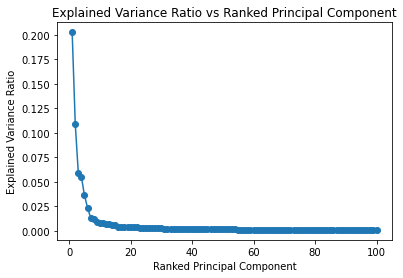

In [76]:
# Plot the explained variance ratio as a function of ranked PC
plt.figure('explained variance ratio as a function of ranked PC')
plt.plot(ranked_pcs, explained_variance_ratio, marker='o')
plt.xlabel('Ranked Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio vs Ranked Principal Component')
plt.show()

# Dominant Genes
## What are the top 10 dominant genes in PC1, PC2, PC3?

In [77]:
X_pca_100.shape[1]

100

In [78]:
#create list of principal components for 100 components
columns = []
for pc in np.arange(1,(X_pca_100.shape[1])+1):
    columns.append('PC'+str(pc))

In [79]:
# create dataframe using values of all 100 principal components, indices from working data matrix
pca_100_data_matrix = pd.DataFrame(X_pca_100, index=updated_data_matrix.index, columns=columns)

In [80]:
pca_100_data_matrix

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC91,PC92,PC93,PC94,PC95,PC96,PC97,PC98,PC99,PC100
3741,-3.346672,-14.282462,-2.187969,-5.599215,-0.885540,-2.134160,3.406369,-2.026301,11.920556,-0.659890,...,1.314602,0.564394,0.144246,0.581180,-0.027416,0.877541,-0.984014,-0.459884,-0.666477,0.018632
755,-5.491855,-12.857789,11.457528,0.187701,4.885922,-6.974131,-0.423431,-3.564349,-5.997958,-2.986164,...,2.265002,0.799486,-0.498256,-0.068916,1.622198,2.164305,-0.320420,-1.635601,-0.392074,-0.748828
172,-8.421344,-7.633519,1.950302,-5.725176,-3.364570,-0.087873,0.966032,-3.108374,0.368874,1.823418,...,0.161368,0.379512,2.121170,1.363806,1.622834,-2.233054,0.771826,-0.744728,2.278292,-0.884855
4403,0.150927,-20.198870,-6.016032,-1.915019,19.213312,-1.443496,-0.941066,0.248664,-7.590968,0.303489,...,-0.042200,1.220977,0.338632,0.823940,0.952190,0.166904,-0.036380,0.353534,0.304793,-0.532612
818,-4.549345,-12.498722,1.404266,-7.390798,-3.075515,2.443280,2.597245,0.695031,2.690973,-0.685201,...,-0.039124,-1.054189,-0.274329,-0.335594,-0.167766,-0.556162,0.360507,-0.311248,0.358441,0.641211
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1247,-15.060325,23.868780,-2.433726,6.029183,0.934116,33.025871,-1.992495,-5.181724,0.008714,4.641386,...,0.504938,2.655581,4.447085,1.028697,2.547875,2.401113,1.072998,-2.036504,-3.863267,-0.150681
685,-19.011639,21.882849,9.544340,5.060494,0.699727,4.111225,1.179509,6.691593,-1.310562,-1.096082,...,-3.484772,1.216274,-1.397945,0.865843,1.323777,-0.222518,0.344198,-1.579913,0.636348,-2.124748
1544,-16.439013,32.194542,-21.906317,-2.040308,5.339810,10.739685,-1.379125,-9.297880,1.218497,-0.365178,...,1.019137,1.122560,-2.598965,1.545063,0.779381,-0.083129,-2.196009,3.304245,-1.235387,2.385482
3114,24.168301,12.045227,-0.455972,-0.702186,-3.445554,0.733141,-5.238490,4.098563,-0.875025,2.873860,...,-3.699084,0.311841,-4.543928,-2.406800,-1.913060,-0.652852,2.978532,-1.677087,3.476850,-1.951834


In [81]:
dfs_t200_concat.loc[:,'gene_id']

3741             Cd83
755              Ndnf
172              Penk
4403              Kdr
818              Nppc
            ...      
1247             Ngef
685     6030419C18Rik
1544    5031426D15Rik
3114             Sc5d
1620           Slc7a4
Name: gene_id, Length: 800, dtype: object

In [82]:
pca_100_data_matrix.loc[:,'PC1']

3741    -3.346672
755     -5.491855
172     -8.421344
4403     0.150927
818     -4.549345
          ...    
1247   -15.060325
685    -19.011639
1544   -16.439013
3114    24.168301
1620   -20.571980
Name: PC1, Length: 800, dtype: float32

In [83]:
#concatenate gene_id and PC vectors for PC1,2,3
pc1 = pd.concat([dfs_t200_concat.loc[:,'gene_id'],pca_100_data_matrix.loc[:,'PC1']],axis=1)
pc2 = pd.concat([dfs_t200_concat.loc[:,'gene_id'],pca_100_data_matrix.loc[:,'PC2']],axis=1)
pc3 = pd.concat([dfs_t200_concat.loc[:,'gene_id'],pca_100_data_matrix.loc[:,'PC3']],axis=1)

In [84]:
pc1.shape

(800, 2)

In [85]:
pc1

,gene_id,PC1
3741,Cd83,-3.346672
755,Ndnf,-5.491855
172,Penk,-8.421344
4403,Kdr,0.150927
818,Nppc,-4.549345
...,...,...
1247,Ngef,-15.060325
685,6030419C18Rik,-19.011639
1544,5031426D15Rik,-16.439013
3114,Sc5d,24.168301


In [86]:
#sort each PC from from highest to lowest, and display top 10 genes
pc1.sort_values(by = 'PC1', ascending = False)[:10]

,gene_id,PC1
3659,Trf,165.368179
3389,Mog,140.320480
3666,Apod,136.766891
3442,Ugt8a,128.079224
3297,Mobp,119.167259
3600,Ermn,116.847153
3448,Mag,111.357048
3234,Cldn11,103.231552
3406,Opalin,84.018776
3605,Aspa,83.211082


In [87]:
pc2.sort_values(by = 'PC2', ascending = False)[:10]

,gene_id,PC2
1670,Crym,76.328049
1586,Nov,62.491798
3659,Trf,61.867912
1581,Cpne7,56.470589
3048,Wfs1,54.869480
76,Cnr1,54.393127
3389,Mog,51.245583
3666,Apod,48.304432
3030,Wipf3,47.787735
3442,Ugt8a,46.140976


In [88]:
pc3.sort_values(by = 'PC3', ascending = False)[:10]

,gene_id,PC3
699,Gad1,66.058197
718,Gad2,62.132286
767,Npy,53.315609
112,Rph3a,45.660591
669,Slc6a1,42.702690
1035,Vstm2a,41.091415
753,Spock3,39.892036
379,Rcan2,38.537277
76,Cnr1,37.489353
593,Nrip3,36.189991


# Hypothesis Testing
## Use hypothesis testing to find which PC separate best class “pyramidal SS” from “interneurons”. Use ranksum test for this hypothesis testing. Report the p-value and the top genes that relate to this PC.

General approach: order two PCs for smalled to larget, rank each PC, then sum each rank, then sum the two sums of ranks, which is equal to (n(n+1)/2). Determine critical value U based on p-value/n1/n2 table, then compute U using rank sums and n1 and n2. If computed U <= critical value U, reject H0. See https://sphweb.bumc.bu.edu/otlt/mph-modules/bs/bs704_nonparametric/bs704_nonparametric4.html

how to know which pc corresponds to which class?

In [89]:
X_pca_100.shape

(800, 100)

In [90]:
cls

,sscortex,sscortex.1,sscortex.2,sscortex.3,sscortex.4,sscortex.5,sscortex.6,ca1hippocampus,sscortex.7,sscortex.8,...,ca1hippocampus.1310,sscortex.1685,sscortex.1686,sscortex.1687,sscortex.1688,ca1hippocampus.1311,ca1hippocampus.1312,sscortex.1689,ca1hippocampus.1313,sscortex.1690
level1class,interneurons,interneurons,interneurons,interneurons,interneurons,interneurons,interneurons,interneurons,interneurons,interneurons,...,endothelial-mural,endothelial-mural,endothelial-mural,endothelial-mural,endothelial-mural,endothelial-mural,endothelial-mural,endothelial-mural,endothelial-mural,endothelial-mural


### S1 subtypes: 

S1PyrL23
S1PyrL4
S1PyrL5a
S1PyrL5
S1PyrL6
S1PyrL6b
S1PyrDL

In [91]:
dfs_t200_concat.loc[dfs_t200_concat['gene_id'] == 'Gad1']

,gene_id,mu,sigma,cv
699,Gad1,0.645646,1.584358,2.453912


In [92]:
gene_id

,gene_id
10,Tspan12
11,Tshz1
12,Fnbp1l
13,Adamts15
14,Cldn12
...,...
19977,Gm20738_loc4
19978,Gm20738_loc6
19979,Gm21943_loc1
19980,Gm21943_loc3


In [93]:
gene_id_filtered

,gene_id
10,Tspan12
11,Tshz1
12,Fnbp1l
14,Cldn12
17,Sema3c
...,...
19957,Rab9
19961,Msl3
19965,Vamp7
19969,Kdm5d


In [94]:
dfs_t200_concat

,gene_id,mu,sigma,cv
3741,Cd83,0.157991,0.563283,3.565285
755,Ndnf,0.189371,0.655835,3.463237
172,Penk,0.196587,0.654405,3.328841
4403,Kdr,0.19813,0.657448,3.318258
818,Nppc,0.133926,0.444312,3.317583
...,...,...,...,...
1247,Ngef,0.762309,1.060402,1.391039
685,6030419C18Rik,0.649196,0.902514,1.390202
1544,5031426D15Rik,0.822775,1.143489,1.389797
3114,Sc5d,0.649682,0.902897,1.389753


# Dimensionaliy reduction with tSNE
## For dimensional reduction using tSNE use as input the first 30 PC. Show the results of the tSNE for perplexity 5,10,30,100. For each value plot each dot in the x-y plan such that each color represents one of the “class” variable

In [95]:
tSNE_input = X_pca_100[:,:30]
print (tSNE_input)
print (tSNE_input.shape)

[[ -3.346672   -14.282462    -2.1879687  ...  -0.5645885    6.4321003
    1.4236813 ]
 [ -5.4918547  -12.857789    11.457528   ...  -1.927327     0.7290678
    0.09691327]
 [ -8.421344    -7.6335187    1.9503025  ...   2.7137272   -0.385603
   -3.0209227 ]
 ...
 [-16.439013    32.194542   -21.906317   ...   2.8780646   -2.1089098
    3.5998297 ]
 [ 24.1683      12.045227    -0.45597208 ...   1.7487509   -4.5145307
   -1.8466573 ]
 [-20.57198     28.602943    -7.3779078  ...  -0.4131477    1.0423502
    0.26930547]]
(800, 30)


In [96]:
# use tSNE to reduce to 2 components
n_components = 2

# Create a t-SNE object
tsne_p5 = TSNE(n_components=n_components, init='pca', perplexity = 5)
tsne_p10 = TSNE(n_components=n_components, init='pca', perplexity = 10)
tsne_p30 = TSNE(n_components=n_components, init='pca', perplexity = 30)
tsne_p100 = TSNE(n_components=n_components, init='pca', perplexity = 100)

In [97]:
# Apply t-SNE on the principal components
X_tsne_p5 = tsne_p5.fit_transform(X_pca_100[:,:30])
X_tsne_p10 = tsne_p10.fit_transform(X_pca_100[:,:30])
X_tsne_p30 = tsne_p30.fit_transform(X_pca_100[:,:30])
X_tsne_p100 = tsne_p100.fit_transform(X_pca_100[:,:30])

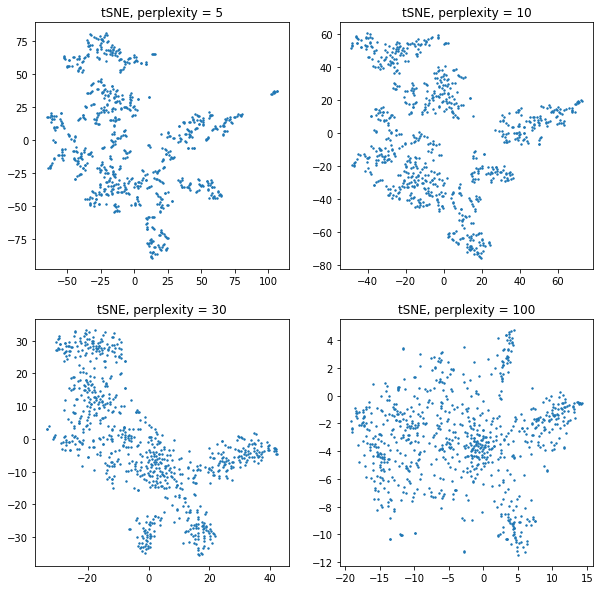

In [98]:
ax, fig = plt.subplots(2,2, figsize = (10,10))

fig[0,0].title.set_text('tSNE, perplexity = 5')
fig[0,1].title.set_text('tSNE, perplexity = 10')
fig[1,0].title.set_text('tSNE, perplexity = 30')
fig[1,1].title.set_text('tSNE, perplexity = 100')
fig[0,0].scatter(X_tsne_p5[:, 0], X_tsne_p5[:, 1], s = 2)
fig[0,1].scatter(X_tsne_p10[:, 0], X_tsne_p10[:, 1], s = 2)
fig[1,0].scatter(X_tsne_p30[:, 0], X_tsne_p30[:, 1], s = 2)
fig[1,1].scatter(X_tsne_p100[:, 0], X_tsne_p100[:, 1], s = 2)

plt.show()

# Clustering
## Clustering: use three clustering approaches to compare. 
### k-means on PCA space with k=9

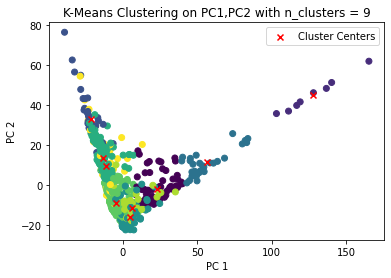

In [99]:
# Set the number of clusters
n_clusters = 9
# Create a KMeans object
kmeans = KMeans(n_clusters=n_clusters)
# Fit the data to the KMeans model
kmeans.fit(X_pca_100)
# Get the cluster labels and cluster centers
labels = kmeans.labels_
centers = kmeans.cluster_centers_
# Plot first two PCs
plt.figure('k-means clustering')
plt.scatter(X_pca_100[:, 0], X_pca_100[:, 1], c=labels)
plt.scatter(centers[:, 0], centers[:, 1], marker='x', color='red', label='Cluster Centers')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('K-Means Clustering on PC1,PC2 with n_clusters = 9')
plt.legend()
plt.show()


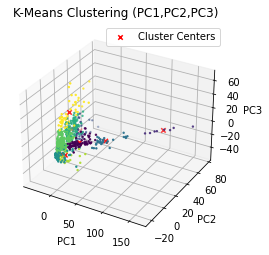

In [100]:
# Plot first 3 PCs
plt.figure('k-means clustering (3D)')
ax = plt.axes(projection ="3d")
ax.scatter3D(X_pca_100[:, 0], X_pca_100[:, 1], X_pca_100[:, 2], c=labels, s= 2)
ax.scatter3D(centers[:, 0], centers[:, 1],centers[:,2], marker='x', color='red', label='Cluster Centers')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.title('K-Means Clustering (PC1,PC2,PC3)')
plt.legend()
plt.show()

### linkage (average correlation) on the PCA space and then use cluster to 9 clusters

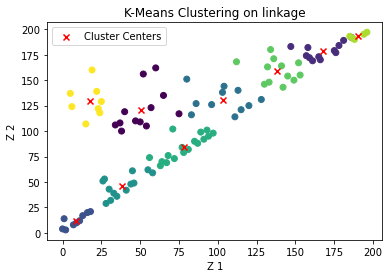

In [101]:
# Calculate the linkage matrix using average correlation
Z = linkage(X_pca_100.T, method='average', metric='correlation')
# Set the number of clusters
n_clusters = 9
# Create a KMeans object
kmeans = KMeans(n_clusters=n_clusters)
# Fit the data to the linkage matrix
kmeans.fit(Z)
# Get the cluster labels and cluster centers
labels = kmeans.labels_
centers = kmeans.cluster_centers_
# Plot first two PCs
plt.figure('k-means clustering on linkage')
plt.scatter(Z[:, 0], Z[:, 1], c=labels)
plt.scatter(centers[:, 0], centers[:, 1], marker='x', color='red', label='Cluster Centers')
plt.xlabel('Z 1')
plt.ylabel('Z 2')
plt.title('K-Means Clustering on linkage')
plt.legend()
plt.show()


### DBSCAN on the tSNE results (use min_pts=30, and choose epsilon). Show the clustering results on the tSNE plot and evaluate the performance of each method.

('nclusters:', 10)


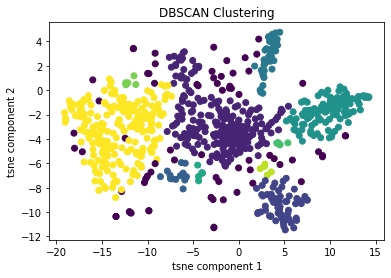

In [102]:
# Create a DBSCAN object
dbscan = DBSCAN(eps=.9, min_samples=5)

# Fit the data to the DBSCAN model
dbscan.fit(X_tsne_p100)

# Get the cluster labels
labels = dbscan.labels_

# Get the number of clusters (ignoring outliers, labeled as -1)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print (('nclusters:', n_clusters))

# Plot the data points colored by cluster labels
plt.figure('DBSCAN on tSNE results')
plt.scatter(X_tsne_p100[:, 0], X_tsne_p100[:, 1], c=labels)
plt.xlabel('tsne component 1')
plt.ylabel('tsne component 2')
plt.title('DBSCAN Clustering')
plt.show()

